In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns


In [53]:
df = pd.read_excel("loan.xlsx")
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [54]:
sex = pd.get_dummies(df['Sex'])
res_s = pd.get_dummies(df['Res_status'])
tele = pd.get_dummies(df['Telephone'])
occup= pd.get_dummies(df['Occupation'])
job_s = pd.get_dummies(df['Job_status'])
acc_r = pd.get_dummies(df['Acc_ref'])
lia_ref = pd.get_dummies(df['Liab_ref'])
dec = pd.get_dummies(df['Decision'])
df= pd.concat((df,sex,res_s,tele,occup,job_s,acc_r,lia_ref,dec),axis=1)

df.head(10)

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,...,retired,self_empl,student,unemploye,given,oth_inst_,f,t,accept,reject
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,...,0,0,0,1,1,0,1,0,0,1
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,...,0,0,0,0,1,0,0,1,0,1
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,...,0,0,0,0,1,0,1,0,1,0
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,...,0,0,0,0,1,0,1,0,1,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,...,0,0,0,0,1,0,1,0,0,1
5,F,16.080000,0.335,owner,given,unemploye,unemploye,0,1,f,...,0,0,0,1,1,0,1,0,0,1
6,M,23.170000,11.125,owner,given,professio,governmen,0,1,f,...,0,0,0,0,1,0,1,0,1,0
7,F,27.580000,3.000,owner,given,manager,private_s,2,1,t,...,0,0,0,0,1,0,0,1,0,1
8,F,19.170000,5.415,owner,given,guard_etc,governmen,0,0,f,...,0,0,0,0,1,0,1,0,0,1
9,F,27.250000,0.290,owner,given,manager,governmen,0,1,t,...,0,0,0,0,1,0,0,1,0,1


In [55]:
df =df.drop(['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref','Decision'],axis=1)
df.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,F,M,owner,rent,...,retired,self_empl,student,unemploye,given,oth_inst_,f,t,accept,reject
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,1
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,1


In [56]:
X = df.values
y = df['accept'].values
X = df.drop(['accept','reject'],axis=1)
X.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,F,M,owner,rent,...,military,private_s,retired,self_empl,student,unemploye,given,oth_inst_,f,t
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


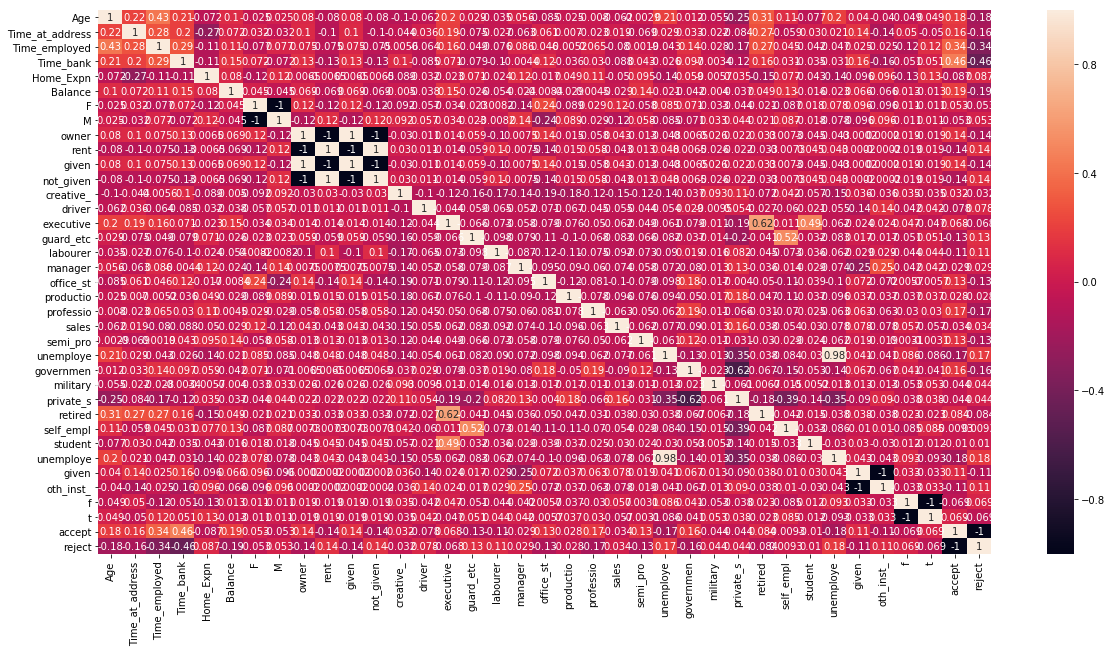

In [57]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)

# Performing SVM on Scaled data: 
    1.Kernel-RBF

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=0)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [87]:
clf_svm= SVC(kernel="rbf",random_state=0)
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=0)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


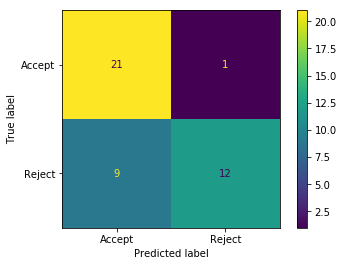

In [88]:
plot_confusion_matrix(clf_svm, X_test_scaled,y_test,values_format='d', display_labels=["Accept","Reject"])

In [61]:
#trying to look for best gamma and C values
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [62]:
optimal_params = GridSearchCV(SVC(), param_grid,cv=5,scoring='accuracy',verbose=0)


In [63]:

optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [92]:
clf_svm= SVC(random_state=0, C=100, gamma=0.0001)
clf_svm.fit(X_train_scaled,y_train)
y_pred= clf_svm.predict(X_test_scaled)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


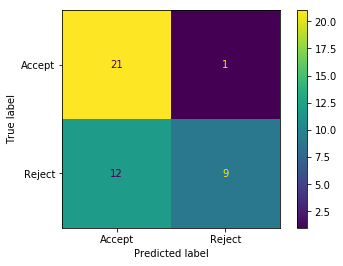

In [93]:
plot_confusion_matrix(clf_svm, X_test_scaled,y_test,values_format='d', display_labels=["Accept","Reject"])

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6976744186046512

In [66]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=3)
scaler = StandardScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.Kernel-Poly

In [96]:
clf_svm_poly= SVC(kernel= "poly",random_state=0 )
clf_svm_poly.fit(X_train_scaled,y_train)
y_pred= clf_svm_poly.predict(X_test_scaled)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


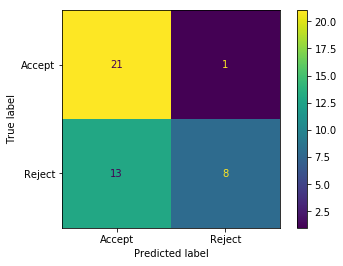

In [97]:
plot_confusion_matrix(clf_svm_poly, X_test_scaled,y_test,values_format='d', display_labels=["Accept","Reject"])

In [98]:
accuracy_score(y_test,y_pred)

0.6744186046511628

# 3.Kernel-Linear

In [99]:
clf_svm_linear= SVC(kernel= "linear",random_state=0 )
clf_svm_linear.fit(X_train_scaled,y_train)
y_pred= clf_svm_linear.predict(X_test_scaled)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


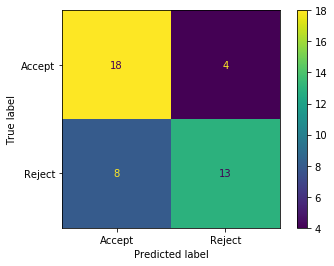

In [100]:
plot_confusion_matrix(clf_svm_linear, X_test_scaled,y_test,values_format='d', display_labels=["Accept","Reject"])

In [101]:
accuracy_score(y_test,y_pred)

0.7209302325581395

# Performing SVM for Unscaled data

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result: ")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result: ")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_test, pred)}n")

# 1.kernel-Linear

In [133]:
from sklearn.svm import LinearSVC
model_linear = LinearSVC(loss='hinge', dual=True)
model_linear.fit(X_train,y_train)
y_predict =model_linear.predict(X_test)

print_score(model_linear, X_train, y_train, X_test, y_test, train=True)
print_score(model_linear, X_train, y_train, X_test, y_test, train=False)


Train Result: 
Accuracy Score: 66.06%
_______________________________________________
CLASSIFICATION REPORT:n                    0           1  accuracy   macro avg  weighted avg
f1-score     0.758748    0.427948  0.660622    0.593348      0.612202
precision    0.628049    0.844828  0.660622    0.736438      0.724083
recall       0.958140    0.286550  0.660622    0.622345      0.660622
support    215.000000  171.000000  0.660622  386.000000    386.000000
_______________________________________________
Confusion Matrix: n [[206   9]
 [122  49]]n
Test Result: 
Accuracy Score: 58.14%
_______________________________________________
CLASSIFICATION REPORT:n                   0          1  accuracy  macro avg  weighted avg
f1-score    0.689655   0.357143  0.581395   0.523399      0.527265
precision   0.555556   0.714286  0.581395   0.634921      0.633075
recall      0.909091   0.238095  0.581395   0.573593      0.581395
support    22.000000  21.000000  0.581395  43.000000     43.000000
______

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


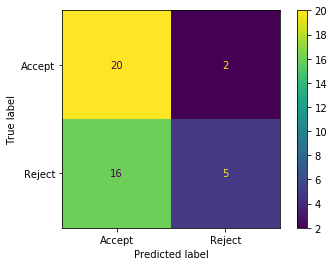

In [134]:
plot_confusion_matrix(model_linear, X_test,y_test,values_format='d', display_labels=["Accept","Reject"])

In [135]:
accuracy_score(y_test,y_predict)

0.5813953488372093

# 2.Kernel-Poly

In [136]:
from sklearn.svm import SVC
# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials
model_poly = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model_poly.fit(X_train, y_train)
y_predit =model.predict(X_test)

print_score(model_poly, X_train, y_train, X_test, y_test, train=True)
print_score(model_poly, X_train, y_train, X_test, y_test, train=False)

Train Result: 
Accuracy Score: 68.91%
_______________________________________________
CLASSIFICATION REPORT:n                    0           1  accuracy   macro avg  weighted avg
f1-score     0.760000    0.558824  0.689119    0.659412      0.670878
precision    0.666667    0.752475  0.689119    0.709571      0.704680
recall       0.883721    0.444444  0.689119    0.664083      0.689119
support    215.000000  171.000000  0.689119  386.000000    386.000000
_______________________________________________
Confusion Matrix: n [[190  25]
 [ 95  76]]n
Test Result: 
Accuracy Score: 55.81%
_______________________________________________
CLASSIFICATION REPORT:n                   0          1  accuracy  macro avg  weighted avg
f1-score    0.666667   0.344828   0.55814   0.505747      0.509489
precision   0.542857   0.625000   0.55814   0.583929      0.582973
recall      0.863636   0.238095   0.55814   0.550866      0.558140
support    22.000000  21.000000   0.55814  43.000000     43.000000
______

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


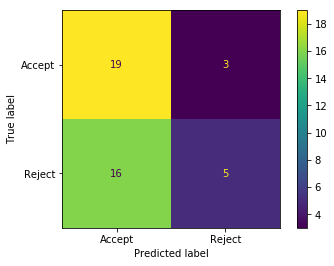

In [137]:
plot_confusion_matrix(model_poly, X_test,y_test,values_format='d', display_labels=["Accept","Reject"])

In [138]:
accuracy_score(y_test,y_predict)

0.5813953488372093

# Kernel-RBF

In [146]:
model_rbf = SVC(kernel='rbf', gamma=0.0001, C=100)
clf=model_rbf.fit(X_train, y_train)
y_predict =model_rbf.predict(X_test)

print_score(model_rbf, X_train, y_train, X_test, y_test, train=True)
print_score(model_rbf, X_train, y_train, X_test, y_test, train=False)


Train Result: 
Accuracy Score: 62.44%
_______________________________________________
CLASSIFICATION REPORT:n                    0           1  accuracy   macro avg  weighted avg
f1-score     0.738739    0.331797  0.624352    0.535268      0.558462
precision    0.602941    0.782609  0.624352    0.692775      0.682535
recall       0.953488    0.210526  0.624352    0.582007      0.624352
support    215.000000  171.000000  0.624352  386.000000    386.000000
_______________________________________________
Confusion Matrix: n [[205  10]
 [135  36]]n
Test Result: 
Accuracy Score: 55.81%
_______________________________________________
CLASSIFICATION REPORT:n                   0          1  accuracy  macro avg  weighted avg
f1-score    0.688525   0.240000   0.55814   0.464262      0.469478
precision   0.538462   0.750000   0.55814   0.644231      0.641771
recall      0.954545   0.142857   0.55814   0.548701      0.558140
support    22.000000  21.000000   0.55814  43.000000     43.000000
______

In [147]:
accuracy_score(y_test,y_predict)

0.5581395348837209

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


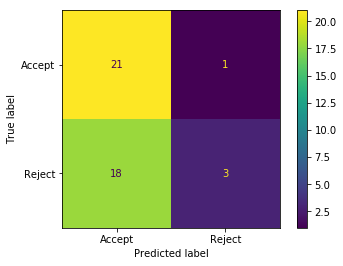

In [148]:
plot_confusion_matrix(model_rbf, X_test,y_test,values_format='d', display_labels=["Accept","Reject"])